In [164]:
import numpy as np
import utils
import plotting_tools as pt

In [165]:
Nx = 150
Ny = 150
et = 1E6
N = 1
base_fn = 'output_swe'
pydir = '../%s/' %base_fn

tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
tags = tc.get_tag_dict()

0.0051682037


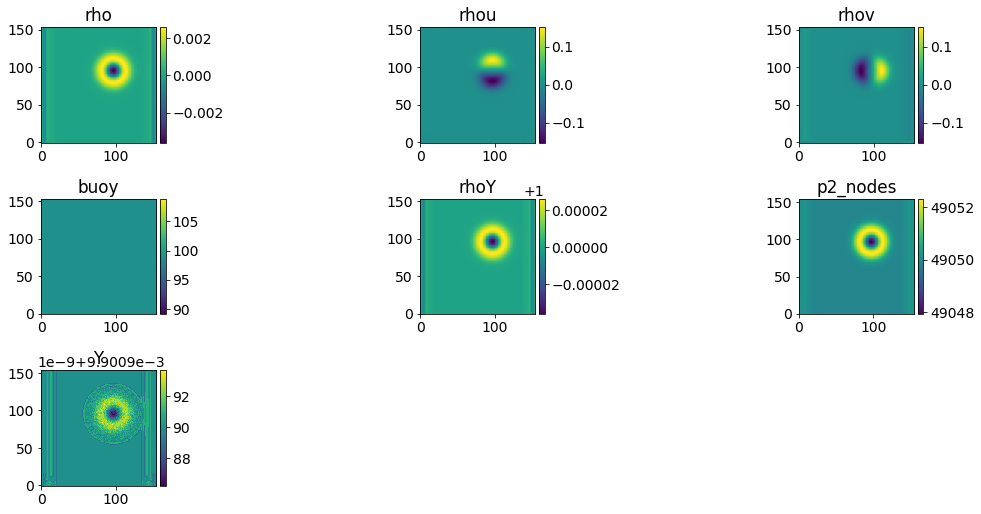

In [258]:
# comp_sfx = 'comp_last_working_ic0'
comp_sfx = 'comp'
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)
tag = tags[9]
# tag = 'ic'
time = 20

H = 100.0
attributes = ['rho','rhou','rhov','buoy','rhoY','p2_nodes']

arr_lst = []
for attribute in attributes:
    arr = tc.get_arr(path, time, N, attribute, label_type='STEP', tag=tag, inner=False, avg=False)[0]
    
    if attribute == 'rho':    
        rho = np.copy(arr)
        arr -= H
    if attribute == 'rhoY':
        rhoY = np.copy(arr)
    arr_lst.append([arr,attribute])
    
Y = rhoY / (rho+1.0)
arr_lst.append([Y, 'Y'])
pl = pt.plotter(arr_lst,ncols=3,figsize=(16,8))
pl.plot(aspect='equal')

print(np.sqrt(np.abs((Y - Y.mean()).sum())))

In [167]:
%%capture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
%matplotlib inline

from IPython.display import HTML

# ref: https://pythonmatplotlibtips.blogspot.com/2018/11/animation-3d-surface-plot-funcanimation-matplotlib.html
N = 150 # Meshsize
# et = 1E6

Lx, Ly = 1E6, 1E6
x = np.linspace(0,Lx,Nx)
y = np.linspace(0,Ly,Ny)

H = 100.0
N = 1

X, Y = np.meshgrid(x, y)

frns = np.arange(30,61) # animation frames
time_series = np.zeros((frns.shape[0],Nx,Ny))

comp_sfx = 'comp'
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)

attribute = 'rho'

for ii,fr in enumerate(frns):
    time_series[ii] = tc.get_arr(path, fr, N, attribute, label_type='STEP', inner=True) - H
    
def update_plot(frame_number, time_series, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, time_series[frame_number,:,:], cmap="magma")

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(X, Y, time_series[0,:,:], color='0.75', rstride=1, cstride=1)]
ax.set_zlim(-.5,.5)
anim = animation.FuncAnimation(fig, update_plot, frn, fargs=(time_series, plot))

In [168]:
HTML(anim.to_html5_video())

0.010000001


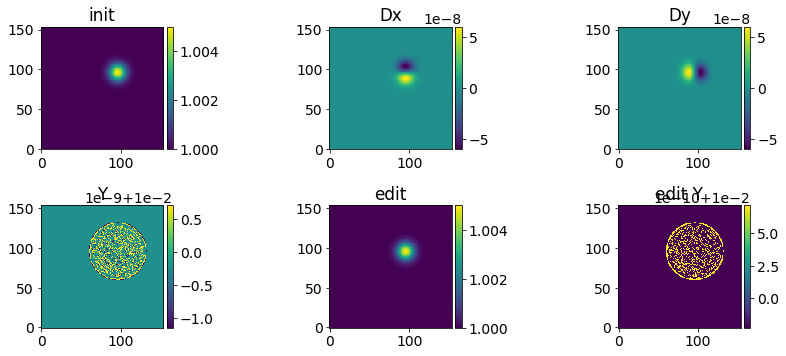

In [80]:
comp_sfx = 'comp'
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)

init = tc.get_arr(path, 0, N, 'rhoY', label_type='STEP', tag='ic', inner=False, avg=False)[0]
init_rho = tc.get_arr(path, 0, N, 'rho', label_type='STEP', tag='ic', inner=False, avg=False)[0]

dx, dy = np.diff(x)[0], np.diff(y)[0]

Dx = np.gradient(init,dx,axis=0)
Dy = np.gradient(init,dy,axis=1)

# edit = init - (Dx + Dy)

# eDx = np.gradient(edit,dx,axis=0)
# eDy = np.gradient(edit,dy,axis=1)

edit = init_rho / 100.0
# edit -= edit.mean()
# edit += 1.0

arr_lst = [[init, "init"], [Dx,'Dx'], [Dy,'Dy']]
Y = init / init_rho
arr_lst += [[Y, 'Y'], [edit, 'edit'], [edit / init_rho, 'edit Y']]
# arr_lst += [[edit, "edit"], [eDx,'eDx'], [eDy,'eDy']]
pl = pt.plotter(arr_lst,ncols=3)
pl.plot(aspect='equal')


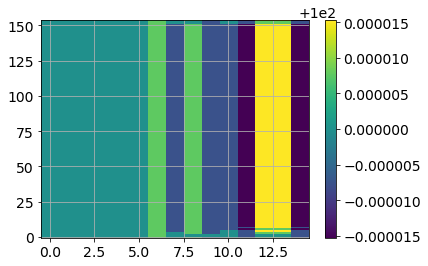

-99.00926208496094
9802.833978608483


In [255]:
rhoY = tc.get_arr(path, 2, N, 'rho', label_type='STEP', inner=False, avg=False)[0]

idx = [103,93]
idx = [94,94]

plt.figure()
plt.imshow(rhoY[:,-15:], origin='lower',aspect='auto')
# plt.plot(idx[0],idx[1],'rx')
plt.colorbar()
plt.grid()
plt.show()

print(1.0 - rhoY[idx[0],idx[1]])
print((1.0 - rhoY[idx[0],idx[1]])**2)

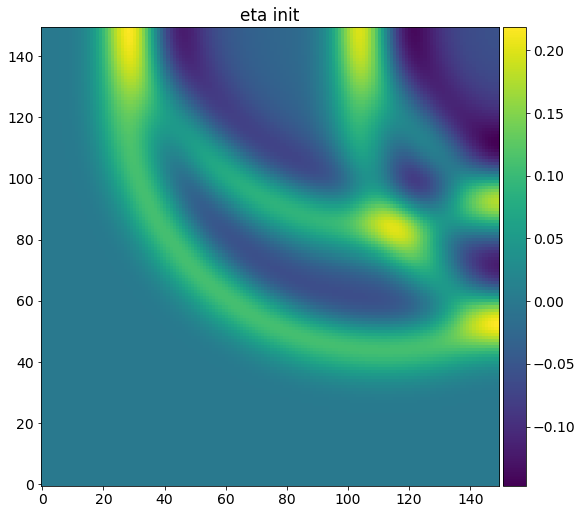

In [145]:
eta = np.load('../output_swe/eta_list.npy')

eta_init = eta[40]
eta_lst = [[eta_init, "eta init"]]
pl = pt.plotter(eta_lst,ncols=1)
pl.plot(aspect='equal')